# Data Exploration

In this notebook we explore the dataset we have and what we have to work with. We also delve into semantics of pythons's built-in `ast` package for parsing code into AST - Abstract Syntax Tree.

In [1]:
import ast
import os
from IPython.display import Image

### Student submissions

We will explore only last submissions, as intermediate ones are more likely to be empty or broken.

Last submissions are located int `processed` directory. They were extracted using `extract.py` script from unpacked `Masinõpe` dataset (not included in this repository). The dataset was provided by Reimo Palm.

Let's find out how long the code is:

In [2]:
longest = (0, '')
# We saw tasks that were 5 lines long, so it will be reasonable to intialise variable with this value and it will gradually minimise
shortest = (100,'') 
average_lengths = {}
for hw in next(os.walk('processed'))[1]:
    for student in next(os.walk(f'processed/{hw}'))[1]:
        length_overall = 0
        submission_count = 0
        for script in next(os.walk(f'processed/{hw}/{student}'))[2]:
            with open(f'processed/{hw}/{student}/{script}', 'r', encoding='UTF-8') as f:
                # Drop empty and blank lines
                lines = sum(1 for _ in filter(lambda line: line.strip(), f.readlines()))
                if lines > longest[0]:
                    longest = (lines, f'{hw}/{student}/{script}')
                if lines < shortest[0]:
                    shortest = (lines, f'{hw}/{student}/{script}')
                length_overall += lines
        submission_count += 1  
        average_lengths[hw] = length_overall / submission_count


In [3]:
print(f'Shortest script, {shortest[1]}, took {shortest[0]} lines of code')
print(f'Longest script, {longest[1]}, took {longest[0]} lines of code')
for k, v in average_lengths.items():
    print(f'On average, homework {k} is {v:.0f} lines long')
# from collections import deque
# deque(((print(f'On average, homework {k} took {v:.0f} lines of code') for k, v in average_lengths.items())), maxlen=0)

Shortest script, K02/S231/kodu3.py, took 0 lines of code
Longest script, K01/S034/kodu1.py, took 397 lines of code
On average, homework K01 is 27 lines long
On average, homework K02 is 30 lines long
On average, homework K03 is 63 lines long
On average, homework K04 is 53 lines long
On average, homework K05 is 87 lines long
On average, homework K07 is 75 lines long
On average, homework K08 is 84 lines long
On average, homework K09 is 40 lines long
On average, homework K10 is 66 lines long
On average, homework K11 is 38 lines long
On average, homework K13 is 21 lines long
On average, homework K14 is 28 lines long
On average, homework K15 is 43 lines long


This was hardly insightful. At least we know that we need to account for empty files and that someone was creative and diligent enough to draw this masterpiece:

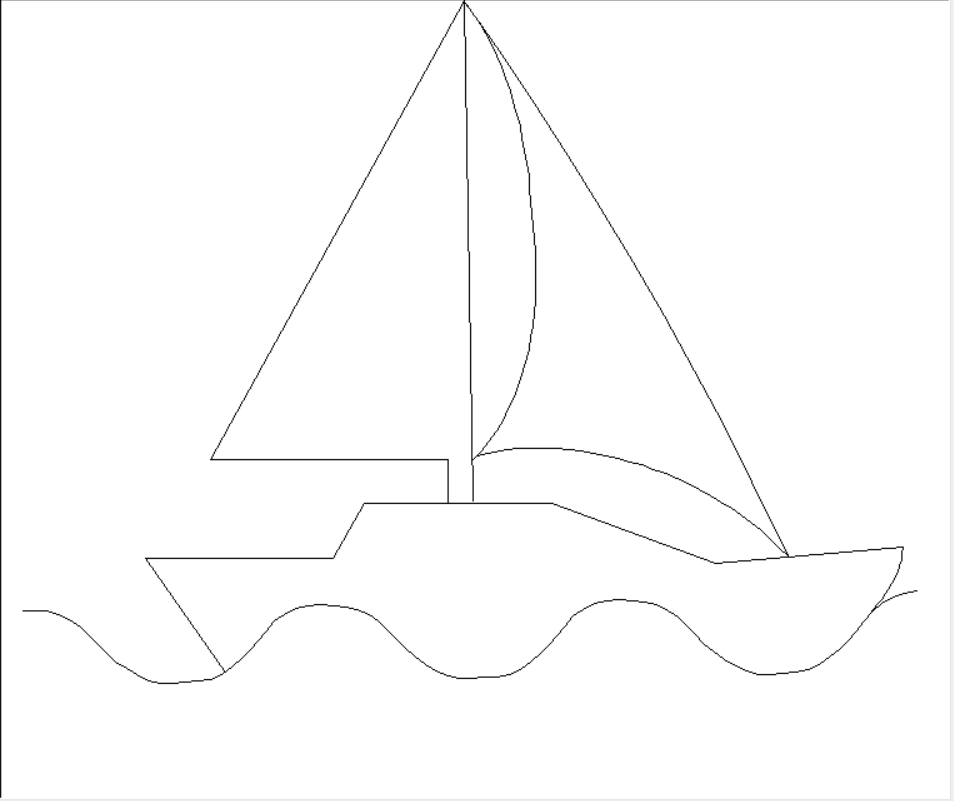

In [4]:
Image('assets/masterpiece.png') 
# Author: student 034

Now, we will check the number of submissions:

In [5]:
submissions_per_student = {}
for hw in next(os.walk('processed'))[1]:
    for student in next(os.walk(f'processed/{hw}'))[1]:
        length_overall = 0
        submission_count = 0
        submissions_per_student[student] = submissions_per_student.get(student, 0) + 1

submissions_stats = {i:0 for i in submissions_per_student.values()}
for k, v in submissions_per_student.items():
    submissions_stats[v] = submissions_stats[v] + 1
sorted_stats = {k:submissions_stats[k] for k in sorted(submissions_stats)}
students = sum(sorted_stats.values())
print(f'Overall, there were {students} who submitted at least something')
for k, v in sorted_stats.items():
    print(f'{v} students submitted {k} {"task" if k==1 else "tasks"}')

Overall, there were 377 who submitted at least something
6 students submitted 1 task
22 students submitted 2 tasks
6 students submitted 3 tasks
8 students submitted 4 tasks
9 students submitted 5 tasks
11 students submitted 6 tasks
12 students submitted 7 tasks
13 students submitted 8 tasks
16 students submitted 9 tasks
27 students submitted 10 tasks
42 students submitted 11 tasks
51 students submitted 12 tasks
154 students submitted 13 tasks


Majority of the students submitted most of the tasks

We can expect our similarity matrices to have at least dimensions of 200x200

We also need to know whether there are any pecularities in the naming of scripts we have to take into account:

In [6]:
scripts = {}
for hw in next(os.walk('processed'))[1]:
    for student in next(os.walk(f'processed/{hw}'))[1]:
        for script in next(os.walk(f'processed/{hw}/{student}'))[2]:
            if hw not in scripts:
                scripts[hw] = set()
            scripts[hw].add(script)
scripts

{'K01': {'kodu1.py'},
 'K02': {'kodu2.py', 'kodu3.py', 'kodu4.py'},
 'K03': {'kodu1.py', 'kodu2.py', 'kodu3.py', 'kodu4.py'},
 'K04': {'kodu1.py', 'kodu2.py', 'kodu3.py'},
 'K05': {'kodu1.py', 'kodu2.py', 'kodu3.py'},
 'K07': {'TAKSOHINNAD.txt',
  'kodu1.py',
  'kodu2.py',
  'kodu3.py',
  'kodu4.py',
  'lisa.py',
  'lisaülesanne.py',
  'taksohinnad.txt',
  'varvid.py'},
 'K08': {'film.py', 'kodu1.py', 'kodu3.py'},
 'K09': {'kodu1.py', 'kodu2.py'},
 'K10': {'kodu1.py', 'kodu2.py'},
 'K11': {'kodu1.py', 'kodu2.py'},
 'K13': {'kodu1.py', 'kodu2.py'},
 'K14': {'kodu1.py', 'kodu2.py'},
 'K15': {'kodu1.py', 'kodu2.py', 'kodu3.py'}}

So, everything except for K07 is standardised (Reimo Palm warned us about `film.py` script in K08 homework).

Time to see how bad the situation is:

In [7]:
scripts = {}
#Having run script multiple times, we added scripts that had more than 250 submissions to this set
standard_scripts = {'kodu1.py', 'kodu2.py', 'kodu3.py'}
for student in next(os.walk(f'processed/K07'))[1]:
    for script in next(os.walk(f'processed/K07/{student}'))[2]:
        if script in standard_scripts:
            continue
        if script not in scripts:
            scripts[script] = [0, []]
        scripts[script][0] += 1
        scripts[script][1].append(student)
scripts

{'taksohinnad.txt': [1, ['S026']],
 'kodu4.py': [4, ['S048', 'S063', 'S329', 'S371']],
 'lisaülesanne.py': [1, ['S080']],
 'TAKSOHINNAD.txt': [1, ['S152']],
 'varvid.py': [1, ['S214']],
 'lisa.py': [1, ['S363']]}

We see that the that only 7 people submitted bonus task. We can account for that and delete these files.

In [8]:
for filename, [_, s_codes] in scripts.items():
    for student in s_codes:
        path = f'processed/K07/{student}/{filename}'
        if os.path.exists(path):
            os.remove(path)

Finally, let's find out how many scripts are valid. For that we will call `ast.parse` function on a script. The rules are simple if `SyntaxError` is thrown then Python interpreter would do the same i.e. script won`t be interpreted. 

In [9]:
invalid_scripts = 0
scripts_overall = 0
invalid_scripts_paths = []
for hw in next(os.walk('processed'))[1]:
    for student in next(os.walk(f'processed/{hw}'))[1]:
        for script in next(os.walk(f'processed/{hw}/{student}'))[2]:
            with open(f'processed/{hw}/{student}/{script}', 'r', encoding='UTF-8') as f:
                scripts_overall += 1
                try:
                    ast.parse(f.read())
                except SyntaxError as e:
                    invalid_scripts += 1
                    invalid_scripts_paths.append(f'{hw}/{student}/{script}')
                    print(e.msg)

print(f'There were {invalid_scripts} invalid scripts')
print(f'It constitutes {invalid_scripts/scripts_overall:.2%} of the scripts')

cannot assign to literal here. Maybe you meant '==' instead of '='?
invalid syntax
invalid syntax
invalid syntax
invalid syntax
invalid syntax
expected ':'
expected 'except' or 'finally' block
expected an indented block after 'else' statement on line 17
invalid syntax
invalid syntax
invalid syntax
illegal target for annotation
unexpected indent
invalid syntax
expected an indented block after 'for' statement on line 6
invalid syntax
invalid syntax
expected an indented block after 'for' statement on line 3
expected ':'
invalid syntax
invalid syntax
invalid syntax. Perhaps you forgot a comma?
unindent does not match any outer indentation level
invalid syntax
invalid syntax. Perhaps you forgot a comma?
leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers
expected an indented block after function definition on line 1
unmatched ')'
expected an indented block after 'while' statement on line 18
expected ':'
invalid syntax
invalid syntax
invalid synta

In [10]:
invalid_scripts_paths

['K02/S126/kodu4.py',
 'K02/S284/kodu4.py',
 'K02/S332/kodu2.py',
 'K03/S024/kodu3.py',
 'K03/S104/kodu1.py',
 'K03/S104/kodu3.py',
 'K03/S104/kodu4.py',
 'K03/S160/kodu4.py',
 'K03/S175/kodu2.py',
 'K03/S199/kodu3.py',
 'K03/S201/kodu4.py',
 'K03/S226/kodu2.py',
 'K03/S226/kodu4.py',
 'K03/S264/kodu4.py',
 'K03/S267/kodu2.py',
 'K03/S290/kodu4.py',
 'K03/S301/kodu2.py',
 'K03/S349/kodu2.py',
 'K03/S367/kodu4.py',
 'K04/S011/kodu3.py',
 'K04/S048/kodu1.py',
 'K04/S048/kodu3.py',
 'K04/S058/kodu1.py',
 'K04/S152/kodu1.py',
 'K04/S152/kodu2.py',
 'K04/S199/kodu3.py',
 'K04/S264/kodu1.py',
 'K04/S268/kodu2.py',
 'K04/S275/kodu1.py',
 'K04/S304/kodu1.py',
 'K04/S341/kodu3.py',
 'K04/S354/kodu2.py',
 'K04/S367/kodu1.py',
 'K05/S009/kodu1.py',
 'K05/S009/kodu3.py',
 'K05/S011/kodu1.py',
 'K05/S057/kodu2.py',
 'K05/S098/kodu2.py',
 'K05/S104/kodu3.py',
 'K05/S224/kodu1.py',
 'K05/S226/kodu2.py',
 'K05/S236/kodu1.py',
 'K05/S245/kodu3.py',
 'K05/S349/kodu2.py',
 'K05/S359/kodu2.py',
 'K07/S009

Code block reported 109 invalid scripts, 1.13% of all submisssions.
We cross-checked and syntax mistakes are indeed made in the last submissions. Fortunately, only about 1% of submitted scripts is invalid. To simplify further processing we will remove them as well.

In [11]:
for sub_path in invalid_scripts_paths:
    path = f'processed/{sub_path}'
    if os.path.exists(path):
        os.remove(path)

Since we won't process the code as a plaint text further analysis will be conducted using `ast` package. 

### AST or Abstract Syntax Tree

#### What is an AST?

AST is a tree representation of the source code, its nodes consist of tokens that represent syntactic features of the given language.

Hi there!
Hi there!
Hi there!
Hi there!
Hi there!
Hi there!
Hi there!
Hi there!
Hi there!
Hi there!


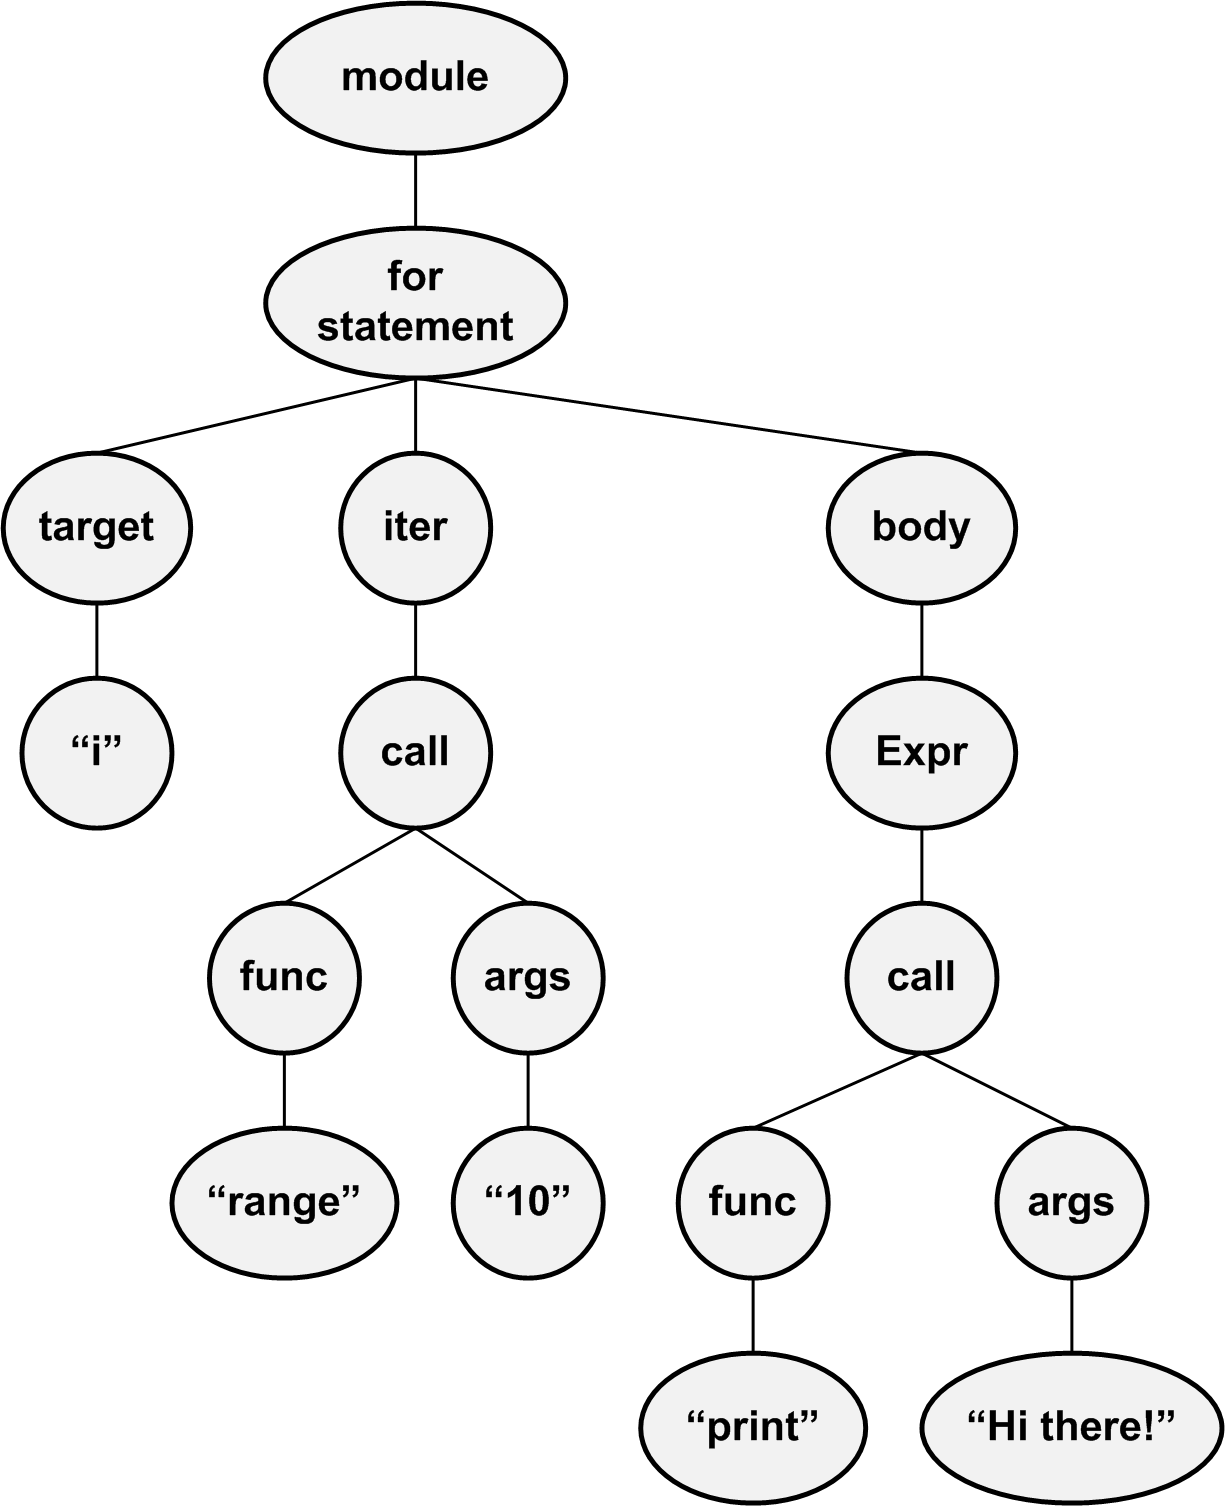

In [12]:
#This code corresponds to the AST below
for i in range(10):
    print('Hi there!')


Image('assets/ast.png', width=400, height=492)#[1]

In [13]:
a = """
for i in range(10):
    print('Hi there!')
"""
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    For(
      target=Name(id='i', ctx=Store()),
      iter=Call(
        func=Name(id='range', ctx=Load()),
        args=[
          Constant(value=10)],
        keywords=[]),
      body=[
        Expr(
          value=Call(
            func=Name(id='print', ctx=Load()),
            args=[
              Constant(value='Hi there!')],
            keywords=[]))],
      orelse=[])],
  type_ignores=[])


#### Motivation behind using AST

It is quite easy to rename variables and make plain text analysis fail. Therefore, we need to account for control-flow and syntax factor of the source code. AST allows us to do exactly that.
It allows us to analyse code and reduce the role variable renaming plays in the analysis.

Let's first explore what ASTs are generated from familiar python code snippets (`ast` has an abstract about python abstract grammar and how it is linked to fields and attributes of `ast.Node` classes, yet it is more intuitive to see the actual tree structure than guess it)

#### Variable declarations

In [14]:
a = "a=5"
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Assign(
      targets=[
        Name(id='a', ctx=Store())],
      value=Constant(value=5))],
  type_ignores=[])


In [15]:
a = "a='Sussy Baka'"
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Assign(
      targets=[
        Name(id='a', ctx=Store())],
      value=Constant(value='Sussy Baka'))],
  type_ignores=[])


In [16]:
a = "a=True"
print(ast.dump(ast.parse(a),indent=2))
ast.parse(a).body[0].value.value.__class__.__name__

Module(
  body=[
    Assign(
      targets=[
        Name(id='a', ctx=Store())],
      value=Constant(value=True))],
  type_ignores=[])


'bool'

So constants in the AST have the same type name as the primitives

In [17]:
a = "a=5\nb=a"
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Assign(
      targets=[
        Name(id='a', ctx=Store())],
      value=Constant(value=5)),
    Assign(
      targets=[
        Name(id='b', ctx=Store())],
      value=Name(id='a', ctx=Load()))],
  type_ignores=[])


In [18]:
a = "a=2\na='some val'"
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Assign(
      targets=[
        Name(id='a', ctx=Store())],
      value=Constant(value=2)),
    Assign(
      targets=[
        Name(id='a', ctx=Store())],
      value=Constant(value='some val'))],
  type_ignores=[])


In [19]:
a = "a=b"
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Assign(
      targets=[
        Name(id='a', ctx=Store())],
      value=Name(id='b', ctx=Load()))],
  type_ignores=[])


We can see that AST does not help us to filter faulty programs, `a=b` is syntactic valid structure, yet b is undefined and code will throw runtime error

So far, we have seen that root node is Module, AST nodes are stored either as a field e.g. `value` or in a list e.g. `body`

Other insights: 
- variable instantiation corresponds to `Assign`
- variable names corresponds to `Name` node, names is stored in `id` field, can be cleaned
- `ctx` field corresponds to the action performed on variable(we store new value or load it), can be cleaned 
- Strings are constants (booleans and numbers are obivously constants too), node is `Constant`

#### Arithmetic operations

In [20]:
a = "2+2"
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Expr(
      value=BinOp(
        left=Constant(value=2),
        op=Add(),
        right=Constant(value=2)))],
  type_ignores=[])


In [21]:
a = "a=2+2"
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Assign(
      targets=[
        Name(id='a', ctx=Store())],
      value=BinOp(
        left=Constant(value=2),
        op=Add(),
        right=Constant(value=2)))],
  type_ignores=[])


In [22]:
a = "a=2%2"
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Assign(
      targets=[
        Name(id='a', ctx=Store())],
      value=BinOp(
        left=Constant(value=2),
        op=Mod(),
        right=Constant(value=2)))],
  type_ignores=[])


In [23]:
a = "2+2*2-1"
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Expr(
      value=BinOp(
        left=BinOp(
          left=Constant(value=2),
          op=Add(),
          right=BinOp(
            left=Constant(value=2),
            op=Mult(),
            right=Constant(value=2))),
        op=Sub(),
        right=Constant(value=1)))],
  type_ignores=[])


Nothing really interesting here, binary operations represent a binary tree

In [24]:
a = "-1"
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Expr(
      value=UnaryOp(
        op=USub(),
        operand=Constant(value=1)))],
  type_ignores=[])


Negative constants are actually positive constants to which unary minus is applied

#### Comparison operators

In [25]:
a = "3==2"
print(ast.dump(ast.parse(a), indent=2))

Module(
  body=[
    Expr(
      value=Compare(
        left=Constant(value=3),
        ops=[
          Eq()],
        comparators=[
          Constant(value=2)]))],
  type_ignores=[])


In [26]:
a = "a=3\na==2"
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Assign(
      targets=[
        Name(id='a', ctx=Store())],
      value=Constant(value=3)),
    Expr(
      value=Compare(
        left=Name(id='a', ctx=Load()),
        ops=[
          Eq()],
        comparators=[
          Constant(value=2)]))],
  type_ignores=[])


In [27]:
a = "1==2==3"
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Expr(
      value=Compare(
        left=Constant(value=1),
        ops=[
          Eq(),
          Eq()],
        comparators=[
          Constant(value=2),
          Constant(value=3)]))],
  type_ignores=[])


In [28]:
a = "1<=3>=2"
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Expr(
      value=Compare(
        left=Constant(value=1),
        ops=[
          LtE(),
          GtE()],
        comparators=[
          Constant(value=3),
          Constant(value=2)]))],
  type_ignores=[])


Comparison operators represent a sequence, rather contrintuitive we would say

#### If-else control flow

In [29]:
a = """
if 3==2:
    pass
elif 2==2:
    pass 
else:
    ...
"""
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    If(
      test=Compare(
        left=Constant(value=3),
        ops=[
          Eq()],
        comparators=[
          Constant(value=2)]),
      body=[
        Pass()],
      orelse=[
        If(
          test=Compare(
            left=Constant(value=2),
            ops=[
              Eq()],
            comparators=[
              Constant(value=2)]),
          body=[
            Pass()],
          orelse=[
            Expr(
              value=Constant(value=Ellipsis))])])],
  type_ignores=[])


We see that `elif` is syntactic sugar it is just else with if-else block inside

On the side note
- Ellipsis is a constant too

If-else expression

In [30]:
a = """2 if True else 5"""
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Expr(
      value=IfExp(
        test=Constant(value=True),
        body=Constant(value=2),
        orelse=Constant(value=5)))],
  type_ignores=[])


#### Data Structures

Lists

In [31]:
a = "[1,2,3,4,5]"
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Expr(
      value=List(
        elts=[
          Constant(value=1),
          Constant(value=2),
          Constant(value=3),
          Constant(value=4),
          Constant(value=5)],
        ctx=Load()))],
  type_ignores=[])


In [32]:
a = """
a=[1,2,3,4,5]
a[0]=2
"""
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Assign(
      targets=[
        Name(id='a', ctx=Store())],
      value=List(
        elts=[
          Constant(value=1),
          Constant(value=2),
          Constant(value=3),
          Constant(value=4),
          Constant(value=5)],
        ctx=Load())),
    Assign(
      targets=[
        Subscript(
          value=Name(id='a', ctx=Load()),
          slice=Constant(value=0),
          ctx=Store())],
      value=Constant(value=2))],
  type_ignores=[])


In [33]:
a = """
a=[1,2,3,4,5]
a[1:2]=[2,3]
"""
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Assign(
      targets=[
        Name(id='a', ctx=Store())],
      value=List(
        elts=[
          Constant(value=1),
          Constant(value=2),
          Constant(value=3),
          Constant(value=4),
          Constant(value=5)],
        ctx=Load())),
    Assign(
      targets=[
        Subscript(
          value=Name(id='a', ctx=Load()),
          slice=Slice(
            lower=Constant(value=1),
            upper=Constant(value=2)),
          ctx=Store())],
      value=List(
        elts=[
          Constant(value=2),
          Constant(value=3)],
        ctx=Load()))],
  type_ignores=[])


In [34]:
a = """
a=[1,2,3,4,5]
a[:]=[2,3]
"""
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Assign(
      targets=[
        Name(id='a', ctx=Store())],
      value=List(
        elts=[
          Constant(value=1),
          Constant(value=2),
          Constant(value=3),
          Constant(value=4),
          Constant(value=5)],
        ctx=Load())),
    Assign(
      targets=[
        Subscript(
          value=Name(id='a', ctx=Load()),
          slice=Slice(),
          ctx=Store())],
      value=List(
        elts=[
          Constant(value=2),
          Constant(value=3)],
        ctx=Load()))],
  type_ignores=[])


In [35]:
a = """
a=[1,2,3,4,5]
a[1:2]
"""
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Assign(
      targets=[
        Name(id='a', ctx=Store())],
      value=List(
        elts=[
          Constant(value=1),
          Constant(value=2),
          Constant(value=3),
          Constant(value=4),
          Constant(value=5)],
        ctx=Load())),
    Expr(
      value=Subscript(
        value=Name(id='a', ctx=Load()),
        slice=Slice(
          lower=Constant(value=1),
          upper=Constant(value=2)),
        ctx=Load()))],
  type_ignores=[])


In [36]:
a = """
a=[1,2,3,4,5]
a.append(3)
"""
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Assign(
      targets=[
        Name(id='a', ctx=Store())],
      value=List(
        elts=[
          Constant(value=1),
          Constant(value=2),
          Constant(value=3),
          Constant(value=4),
          Constant(value=5)],
        ctx=Load())),
    Expr(
      value=Call(
        func=Attribute(
          value=Name(id='a', ctx=Load()),
          attr='append',
          ctx=Load()),
        args=[
          Constant(value=3)],
        keywords=[]))],
  type_ignores=[])


Tuples

In [37]:
a = "(1, 2)"
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Expr(
      value=Tuple(
        elts=[
          Constant(value=1),
          Constant(value=2)],
        ctx=Load()))],
  type_ignores=[])


Dictionaries

In [38]:
a = "{'a':2}"
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Expr(
      value=Dict(
        keys=[
          Constant(value='a')],
        values=[
          Constant(value=2)]))],
  type_ignores=[])


In [39]:
a = """
a={'a':1}
a['b']=2
"""
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Assign(
      targets=[
        Name(id='a', ctx=Store())],
      value=Dict(
        keys=[
          Constant(value='a')],
        values=[
          Constant(value=1)])),
    Assign(
      targets=[
        Subscript(
          value=Name(id='a', ctx=Load()),
          slice=Constant(value='b'),
          ctx=Store())],
      value=Constant(value=2))],
  type_ignores=[])


Sets

In [40]:
a = "{1, 2, 3}"
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Expr(
      value=Set(
        elts=[
          Constant(value=1),
          Constant(value=2),
          Constant(value=3)]))],
  type_ignores=[])


#### Loops

In [41]:
a = """
for _ in [1,2,3]:
    pass
"""
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    For(
      target=Name(id='_', ctx=Store()),
      iter=List(
        elts=[
          Constant(value=1),
          Constant(value=2),
          Constant(value=3)],
        ctx=Load()),
      body=[
        Pass()],
      orelse=[])],
  type_ignores=[])


In [42]:
a="""
for i in range(5):
    pass
"""
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    For(
      target=Name(id='i', ctx=Store()),
      iter=Call(
        func=Name(id='range', ctx=Load()),
        args=[
          Constant(value=5)],
        keywords=[]),
      body=[
        Pass()],
      orelse=[])],
  type_ignores=[])


In [43]:
a="""
while True:
    pass
"""
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    While(
      test=Constant(value=True),
      body=[
        Pass()],
      orelse=[])],
  type_ignores=[])


Quite unexpectedly loops have `orelse` attribute

#### Functions

In [44]:
a="""
def foo(a, b=2):
    pass
"""
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    FunctionDef(
      name='foo',
      args=arguments(
        posonlyargs=[],
        args=[
          arg(arg='a'),
          arg(arg='b')],
        kwonlyargs=[],
        kw_defaults=[],
        defaults=[
          Constant(value=2)]),
      body=[
        Pass()],
      decorator_list=[])],
  type_ignores=[])


In [45]:
a="""
def foo(a, /, b, *, c=2, d):
    pass
"""
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    FunctionDef(
      name='foo',
      args=arguments(
        posonlyargs=[
          arg(arg='a')],
        args=[
          arg(arg='b')],
        kwonlyargs=[
          arg(arg='c'),
          arg(arg='d')],
        kw_defaults=[
          Constant(value=2),
          None],
        defaults=[]),
      body=[
        Pass()],
      decorator_list=[])],
  type_ignores=[])


In [46]:
a="""
foo(2,3, **{c:2, d:2})
"""
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Expr(
      value=Call(
        func=Name(id='foo', ctx=Load()),
        args=[
          Constant(value=2),
          Constant(value=3)],
        keywords=[
          keyword(
            value=Dict(
              keys=[
                Name(id='c', ctx=Load()),
                Name(id='d', ctx=Load())],
              values=[
                Constant(value=2),
                Constant(value=2)]))]))],
  type_ignores=[])


In [47]:
a="""
def foo(a, /, b, *c, d=2):
    pass
"""
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    FunctionDef(
      name='foo',
      args=arguments(
        posonlyargs=[
          arg(arg='a')],
        args=[
          arg(arg='b')],
        vararg=arg(arg='c'),
        kwonlyargs=[
          arg(arg='d')],
        kw_defaults=[
          Constant(value=2)],
        defaults=[]),
      body=[
        Pass()],
      decorator_list=[])],
  type_ignores=[])


Closures

In [48]:
a="""
def foo():
    def bar():
        pass
"""
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    FunctionDef(
      name='foo',
      args=arguments(
        posonlyargs=[],
        args=[],
        kwonlyargs=[],
        kw_defaults=[],
        defaults=[]),
      body=[
        FunctionDef(
          name='bar',
          args=arguments(
            posonlyargs=[],
            args=[],
            kwonlyargs=[],
            kw_defaults=[],
            defaults=[]),
          body=[
            Pass()],
          decorator_list=[])],
      decorator_list=[])],
  type_ignores=[])


Lambdas

In [49]:
a="a = lambda x: x"
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Assign(
      targets=[
        Name(id='a', ctx=Store())],
      value=Lambda(
        args=arguments(
          posonlyargs=[],
          args=[
            arg(arg='x')],
          kwonlyargs=[],
          kw_defaults=[],
          defaults=[]),
        body=Name(id='x', ctx=Load())))],
  type_ignores=[])


In [50]:
a="""
a = lambda x: x
a(2)
"""
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Assign(
      targets=[
        Name(id='a', ctx=Store())],
      value=Lambda(
        args=arguments(
          posonlyargs=[],
          args=[
            arg(arg='x')],
          kwonlyargs=[],
          kw_defaults=[],
          defaults=[]),
        body=Name(id='x', ctx=Load()))),
    Expr(
      value=Call(
        func=Name(id='a', ctx=Load()),
        args=[
          Constant(value=2)],
        keywords=[]))],
  type_ignores=[])


Python allows for a lot of magic when it comes to arguments passed to functions, yet

#### Classes and OOP

We do not expect to find code that relies on OOP in submissions, yet we need to know how to find out whether code uses it (since OOP was not taught in 2021 Computer Programming I curricula we do not expect to find a lot of submissions using classes and OOP related stuff and probably want to delete those submissions)

In [51]:
a="""
class Foo():
    def __init__():
        self.a = 2
    
    def foo_method(self):
        return 0
"""
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    ClassDef(
      name='Foo',
      bases=[],
      keywords=[],
      body=[
        FunctionDef(
          name='__init__',
          args=arguments(
            posonlyargs=[],
            args=[],
            kwonlyargs=[],
            kw_defaults=[],
            defaults=[]),
          body=[
            Assign(
              targets=[
                Attribute(
                  value=Name(id='self', ctx=Load()),
                  attr='a',
                  ctx=Store())],
              value=Constant(value=2))],
          decorator_list=[]),
        FunctionDef(
          name='foo_method',
          args=arguments(
            posonlyargs=[],
            args=[
              arg(arg='self')],
            kwonlyargs=[],
            kw_defaults=[],
            defaults=[]),
          body=[
            Return(
              value=Constant(value=0))],
          decorator_list=[])],
      decorator_list=[])],
  type_ignores=[])


#### Other pythonic constructs

List comprehensions

In [52]:
a="[i for i in range(4)]"
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Expr(
      value=ListComp(
        elt=Name(id='i', ctx=Load()),
        generators=[
          comprehension(
            target=Name(id='i', ctx=Store()),
            iter=Call(
              func=Name(id='range', ctx=Load()),
              args=[
                Constant(value=4)],
              keywords=[]),
            ifs=[],
            is_async=0)]))],
  type_ignores=[])


In [53]:
a="[0]*10"
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Expr(
      value=BinOp(
        left=List(
          elts=[
            Constant(value=0)],
          ctx=Load()),
        op=Mult(),
        right=Constant(value=10)))],
  type_ignores=[])


Generators

In [54]:
a="b=(i for i in range(5))"
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Assign(
      targets=[
        Name(id='b', ctx=Store())],
      value=GeneratorExp(
        elt=Name(id='i', ctx=Load()),
        generators=[
          comprehension(
            target=Name(id='i', ctx=Store()),
            iter=Call(
              func=Name(id='range', ctx=Load()),
              args=[
                Constant(value=5)],
              keywords=[]),
            ifs=[],
            is_async=0)]))],
  type_ignores=[])


In [55]:
a="""
def foo(a):
    for i in range(5):
        yield i
"""
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    FunctionDef(
      name='foo',
      args=arguments(
        posonlyargs=[],
        args=[
          arg(arg='a')],
        kwonlyargs=[],
        kw_defaults=[],
        defaults=[]),
      body=[
        For(
          target=Name(id='i', ctx=Store()),
          iter=Call(
            func=Name(id='range', ctx=Load()),
            args=[
              Constant(value=5)],
            keywords=[]),
          body=[
            Expr(
              value=Yield(
                value=Name(id='i', ctx=Load())))],
          orelse=[])],
      decorator_list=[])],
  type_ignores=[])


In [56]:
a="a, b=1, 2"
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Assign(
      targets=[
        Tuple(
          elts=[
            Name(id='a', ctx=Store()),
            Name(id='b', ctx=Store())],
          ctx=Store())],
      value=Tuple(
        elts=[
          Constant(value=1),
          Constant(value=2)],
        ctx=Load()))],
  type_ignores=[])


Unpacking

In [57]:
a="""
a = [1, 2, 3]
b,*c = a
"""
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Assign(
      targets=[
        Name(id='a', ctx=Store())],
      value=List(
        elts=[
          Constant(value=1),
          Constant(value=2),
          Constant(value=3)],
        ctx=Load())),
    Assign(
      targets=[
        Tuple(
          elts=[
            Name(id='b', ctx=Store()),
            Starred(
              value=Name(id='c', ctx=Store()),
              ctx=Store())],
          ctx=Store())],
      value=Name(id='a', ctx=Load()))],
  type_ignores=[])


#### Built-in functions and imports

In [58]:
a="import os"
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Import(
      names=[
        alias(name='os')])],
  type_ignores=[])


In [59]:
a="from random import randint"
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    ImportFrom(
      module='random',
      names=[
        alias(name='randint')],
      level=0)],
  type_ignores=[])


In [60]:
a="import numpy as np"
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Import(
      names=[
        alias(name='numpy', asname='np')])],
  type_ignores=[])


In [61]:
a="from numpy import *"
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    ImportFrom(
      module='numpy',
      names=[
        alias(name='*')],
      level=0)],
  type_ignores=[])


In [62]:
a="np.array([1,2,3,4])"
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Expr(
      value=Call(
        func=Attribute(
          value=Name(id='np', ctx=Load()),
          attr='array',
          ctx=Load()),
        args=[
          List(
            elts=[
              Constant(value=1),
              Constant(value=2),
              Constant(value=3),
              Constant(value=4)],
            ctx=Load())],
        keywords=[]))],
  type_ignores=[])


In [63]:
a="sum([1,2])"
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Expr(
      value=Call(
        func=Name(id='sum', ctx=Load()),
        args=[
          List(
            elts=[
              Constant(value=1),
              Constant(value=2)],
            ctx=Load())],
        keywords=[]))],
  type_ignores=[])


As we can see calling methods defined in modules can be simplified by substituting Attribute node for Name to deal with aliases and imported functions

#### Trivia

Comments: 

In [64]:
a="#some comment"
print(ast.dump(ast.parse(a),indent=2))

Module(body=[], type_ignores=[])


Yay! They are cleaned automatically

Docstrings

In [65]:
a="'''some docstring'''"
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Expr(
      value=Constant(value='some docstring'))],
  type_ignores=[])


Unfortunately, they are not cleaned from the code.
Let's try to understand how to detect them just in case

In [66]:
a="'some string'"
print(ast.dump(ast.parse(a),indent=2)) 

Module(
  body=[
    Expr(
      value=Constant(value='some string'))],
  type_ignores=[])


In [67]:
a="a='some docstring' + 'some string'"
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Assign(
      targets=[
        Name(id='a', ctx=Store())],
      value=BinOp(
        left=Constant(value='some docstring'),
        op=Add(),
        right=Constant(value='some string')))],
  type_ignores=[])


In [68]:
a="print('some docstring')"
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Expr(
      value=Call(
        func=Name(id='print', ctx=Load()),
        args=[
          Constant(value='some docstring')],
        keywords=[]))],
  type_ignores=[])


So from constructs using strings, docstrings can be dsitinguished as `Expr` node with `Constant` node value. `Constant` node itself has string value

In [69]:
a="5"
print(ast.dump(ast.parse(a),indent=2))

Module(
  body=[
    Expr(
      value=Constant(value=5))],
  type_ignores=[])


Plus, we can actually clean all constant expressions

### Working with AST

As we can see AST consists of many nodes and its structure is pretty heterogeneous. It would be quite tricky to process it in a simple recursion as can be done with binary trees. Fortunately, `ast` has helper classes `ast.NodeVisitor` for tree traversal and `ast.NodeTransformer` for tree modification.
We will need to subclass these classes, they in turn work by calling `visit_Classname` method on `ast.ClassName` `ast.Node` subclass i.e. we need to define a method for each `ast.Node` type we want to visit/transform.

We now proceed by testing `ast.NodeVisitor` and `ast.NodeTransformer`


We will test `ast.NodeVisitor` by looking for submissions containing docstrings, class definitions, main function (we may need to unwrap it in AST) and some random function name (we will use it for generality latter in submission processing script by wrapping maincode into this function)

In [70]:
class Visitor(ast.NodeVisitor):
    def __init__(self) -> None:
        self.classdef = None
        self.mainfun = None
        self.ae = None
        self.docstrings = []
        super().__init__()
    
    def visit_ClassDef(self, node: ast.ClassDef):
        self.classdef = node
        super().generic_visit(node)

    def visit_FunctionDef(self, node: ast.FunctionDef):
        if node.name == 'main':
            self.mainfun = node
        if node.name == 'XAEA_Xii':
            self.mainfun = node
        super().generic_visit(node)

    def visit_Expr(self, node: ast.Expr):
        if isinstance(node.value, ast.Str):
            self.docstrings.append(node.value)
        super().generic_visit(node)


submissions_for_revision = []
for hw in next(os.walk('processed'))[1]:
    for student in next(os.walk(f'processed/{hw}'))[1]:
        for script in next(os.walk(f'processed/{hw}/{student}'))[2]:
            with open(f'processed/{hw}/{student}/{script}', 'r', encoding='UTF-8') as f:
                tree = ast.parse(f.read())
                visitor = Visitor() 
                visitor.visit(tree)
                path = f'processed/{hw}/{student}/{script}'
                if visitor.classdef:
                    submissions_for_revision.append(('ClassDef', path))
                if visitor.mainfun:
                    submissions_for_revision.append(('MainFun', path))
                if visitor.ae:
                    submissions_for_revision.append(('AE', path))
                if visitor.docstrings:
                    submissions_for_revision.append(('Docstring', path))

In [71]:
print(*filter(lambda pair: pair[0] == 'ClassDef', submissions_for_revision), sep='\n')

('ClassDef', 'processed/K01/S015/kodu1.py')
('ClassDef', 'processed/K02/S168/kodu3.py')
('ClassDef', 'processed/K04/S303/kodu1.py')


In [72]:
print(*filter(lambda pair: pair[0] == 'MainFun', submissions_for_revision), sep='\n')

('MainFun', 'processed/K03/S147/kodu4.py')
('MainFun', 'processed/K04/S088/kodu1.py')
('MainFun', 'processed/K04/S369/kodu1.py')
('MainFun', 'processed/K05/S013/kodu1.py')
('MainFun', 'processed/K05/S052/kodu1.py')
('MainFun', 'processed/K05/S088/kodu1.py')
('MainFun', 'processed/K08/S365/film.py')


In [73]:
print(*filter(lambda pair: pair[0] == 'AE', submissions_for_revision), sep='\n')

In [74]:
print(*filter(lambda pair: pair[0] == 'Docstring', submissions_for_revision), sep='\n')

('Docstring', 'processed/K01/S260/kodu1.py')
('Docstring', 'processed/K02/S254/kodu2.py')
('Docstring', 'processed/K02/S353/kodu2.py')
('Docstring', 'processed/K02/S353/kodu3.py')
('Docstring', 'processed/K03/S020/kodu1.py')
('Docstring', 'processed/K03/S020/kodu2.py')
('Docstring', 'processed/K03/S020/kodu3.py')
('Docstring', 'processed/K03/S020/kodu4.py')
('Docstring', 'processed/K03/S168/kodu2.py')
('Docstring', 'processed/K03/S254/kodu2.py')
('Docstring', 'processed/K03/S333/kodu1.py')
('Docstring', 'processed/K03/S353/kodu2.py')
('Docstring', 'processed/K03/S362/kodu2.py')
('Docstring', 'processed/K04/S049/kodu1.py')
('Docstring', 'processed/K04/S333/kodu1.py')
('Docstring', 'processed/K05/S036/kodu2.py')
('Docstring', 'processed/K05/S063/kodu1.py')
('Docstring', 'processed/K05/S063/kodu2.py')
('Docstring', 'processed/K05/S063/kodu3.py')
('Docstring', 'processed/K05/S082/kodu3.py')
('Docstring', 'processed/K05/S157/kodu1.py')
('Docstring', 'processed/K05/S169/kodu1.py')
('Docstrin

We checked class definitions. They are small and do not really change the logic (two custom Exceptions/Errors and dataclass) so we can just leave the class definitions as they are, as it will make solutions more different hinting at different mindset when solving the task

We will unwrap main functions during AST processing and we will use `XAEA_Xii` as a function name to wrap all maincode into it

And we will clean docstrings from AST

We will test `ast.NodeTransformer` by extracting function definitions from main code

In [75]:
class Transformer(ast.NodeTransformer):
    def __init__(self) -> None:
        self.main = None
        self.funs = []
        super().__init__()

    def generic_visit(self, node):
        return super().generic_visit(node)
    
    def visit_Module(self, node: ast.Module):
        self.main = node
        del node.type_ignores
        super().generic_visit(node)
        return node

    def visit_FunctionDef(self, node: ast.FunctionDef):
        self.funs.append(node)
        delattr(node, "decorator_list")
        delattr(node, "type_comment")
        super().generic_visit(node)

    def get(self):
        return self.main, self.funs

a = """
def foo():
    return

def bar():
    return

a = 2+2
"""

test_tree = ast.parse(a)
transformer = Transformer()
transformer.visit(test_tree)
main, funs = transformer.get()
print(ast.dump(main, indent=2))
print('Functions')
for fun in funs:
    print(ast.dump(fun, indent=2))
    

Module(
  body=[
    Assign(
      targets=[
        Name(id='a', ctx=Store())],
      value=BinOp(
        left=Constant(value=2),
        op=Add(),
        right=Constant(value=2)))])
Functions
FunctionDef(
  name='foo',
  args=arguments(
    posonlyargs=[],
    args=[],
    kwonlyargs=[],
    kw_defaults=[],
    defaults=[]),
  body=[
    Return()])
FunctionDef(
  name='bar',
  args=arguments(
    posonlyargs=[],
    args=[],
    kwonlyargs=[],
    kw_defaults=[],
    defaults=[]),
  body=[
    Return()])


### Conclusions
- There is a number of attributes that do not play role in code similarity, we could clean them for optimisation and better results 
- Loops have `orelse` construct we need to account for that
- Comments are not added to AST, yet docstrings are
- AST structure is pretty general, yet its nodes are still heteregenous. Given that, we have to use Visitor design pattern to apply our business logic to it

### Reference
[1] https://www.codeproject.com/Articles/5310967/Analyzing-Python-with-the-AST-Package